# Breast Cancer

### Carregando Dados com Pandas:

Para carregar conjuntos de dados, frequentemente usamos a função `read_csv` para ler dados de arquivos CSV.


In [29]:
import pandas as pd

previsores = pd.read_csv('entradas_breast.csv')
classe = pd.read_csv('saidas_breast.csv')

### Dividindo o Conjunto de Dados para Treinamento e Teste:

Para treinar e avaliar eficientemente um modelo de aprendizado de máquina, é comum dividir o conjunto de dados em conjuntos de treinamento e teste. A biblioteca scikit-learn oferece uma função conveniente chamada `train_test_split` para realizar essa divisão.

In [30]:
from sklearn.model_selection import train_test_split

previsores_treinamento, previsores_teste, classe_treinamento, classe_teste = train_test_split(previsores, classe, test_size=0.25)

### Construção do Modelo Neural

O código abaixo utiliza a biblioteca Keras para construir um modelo de classificação neural.

* Arquitetura do Modelo:
    * `Sequential()`: Cria um modelo sequencial, onde as camadas são adicionadas em sequência.

    * `Dense(units=16, activation='relu', kernel_initializer='random_uniform', input_dim=30)`: Primeira camada densa com 16 unidades, função de ativação ReLU, inicialização de pesos aleatória e 30 dimensões de entrada.

    * `Dense(units=1, activation='sigmoid')`: Segunda camada densa com 1 unidade e função de ativação sigmoid para problemas de classificação binária.


In [31]:
from keras.models import Sequential
from keras.layers import Dense

classificador = Sequential()

classificador.add(Dense(units = 16, activation='relu', kernel_initializer = 'random_uniform', input_dim = 30))
#classificador.add(Dense(units = 16, activation='relu', kernel_initializer = 'random_uniform'))
classificador.add(Dense(units = 1, activation = 'sigmoid'))

### Treinamento do Classificador Neural

O código abaixo compila e treina o modelo de classificação neural usando Keras:.

* Compilação
    * `optimizer='adam':` Otimizador Adam para ajustar os pesos durante o treinamento.
    * `loss='binary_crossentropy':` Função de perda para problemas de classificação binária.
    * `metrics=['binary_accuracy']`: Métrica de avaliação durante o treinamento, no caso, acurácia binária.

* Treinamento
    * `previsores_treinamento`: Conjunto de dados de entrada para treinamento.
    * `classe_treinamento`: Rótulos correspondentes ao conjunto de treinamento.
    * `batch_size=10`: Número de amostras processadas por atualização de gradiente.
    * `epochs=100`: Número de vezes que o modelo passará por todo o conjunto de treinamento.

In [32]:
classificador.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['binary_accuracy'])
classificador.fit(previsores_treinamento, classe_treinamento, batch_size = 10, epochs = 100)

Epoch 1/100


43/43 [==============================] - 1s 2ms/step - loss: 14.0588 - binary_accuracy: 0.5423
Epoch 2/100
43/43 [==============================] - 0s 2ms/step - loss: 1.5804 - binary_accuracy: 0.6995
Epoch 3/100
43/43 [==============================] - 0s 2ms/step - loss: 1.2249 - binary_accuracy: 0.7653
Epoch 4/100
43/43 [==============================] - 0s 2ms/step - loss: 0.6591 - binary_accuracy: 0.8239
Epoch 5/100
43/43 [==============================] - 0s 2ms/step - loss: 0.6730 - binary_accuracy: 0.8216
Epoch 6/100
43/43 [==============================] - 0s 2ms/step - loss: 0.5214 - binary_accuracy: 0.8498
Epoch 7/100
43/43 [==============================] - 0s 2ms/step - loss: 0.5148 - binary_accuracy: 0.8404
Epoch 8/100
43/43 [==============================] - 0s 2ms/step - loss: 0.4788 - binary_accuracy: 0.8521
Epoch 9/100
43/43 [==============================] - 0s 1ms/step - loss: 0.3924 - binary_accuracy: 0.8897
Epoch 10/100
43/43 [==============================] - 0s 

### Predição com o Modelo Treinado

O trecho de código abaixo realiza predições utilizando o modelo treinado.

* Predição:
    * `previsoes`: Armazena as predições feitas pelo modelo.
    * `classificador`: Modelo neural treinado anteriormente.
    * `previsores_teste`: Conjunto de dados de entrada para o qual as predições estão sendo feitas.

In [33]:
ytest

5/5 [==============================] - 0s 2ms/step


### Avaliação do Modelo

O trecho de código abaixo realiza a avaliação do modelo usando métricas comuns.

* Avaliação:
    
    * `accuracy_score(classe_teste, previsoes)`: Calcula a precisão do modelo, comparando as classes reais (classe_teste) com as previsões feitas pelo modelo (previsoes).
    
    * `confusion_matrix(classe_teste, previsoes)`: Gera uma matriz de confusão, que mostra a distribuição de verdadeiros positivos, verdadeiros negativos, falsos positivos e falsos negativos.


In [34]:
from sklearn.metrics import confusion_matrix, accuracy_score

precisao = accuracy_score(classe_teste, previsoes)
matriz = confusion_matrix(classe_teste, previsoes)

### Visualização da Matriz de Confusão

O código abaixo utiliza a biblioteca Matplotlib e Seaborn para criar um mapa de calor da matriz de confusão, proporcionando uma representação visual dos resultados do modelo.

* Configurações Visuais:
    * `sns.set(font_scale=1.2)`: Ajusta o tamanho da fonte para melhor legibilidade.
    * `sns.heatmap(...)`: Cria um mapa de calor da matriz de confusão com as configurações especificadas.
    * `plt.figure(figsize=(8, 6))`: Define o tamanho da figura para uma apresentação mais clara.
    * `plt.show()`: Exibe o gráfico gerado.

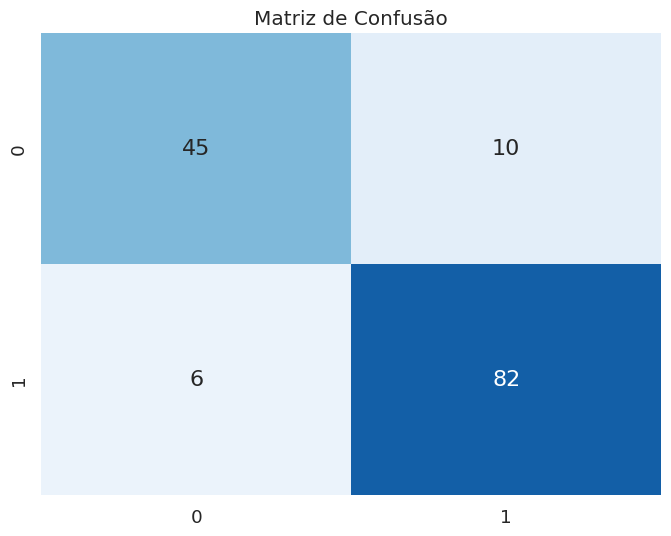

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale=1.2)

plt.figure(figsize=(8, 6))
plt.title("Matriz de Confusão")
plt.xlabel("Previsões")
plt.ylabel("Verdadeiros Valores")
sns.heatmap(matriz, annot=True, fmt="d", cmap="Blues", cbar=False, annot_kws={"size": 16}, linewidths=0, vmin=0, vmax=100)

plt.show()